In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import random

(array([361.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.   ,  808.381, 1616.762, 2425.143, 3233.524, 4041.905,
        4850.286, 5658.667, 6467.048, 7275.429, 8083.81 ]),
 <a list of 10 Patch objects>)

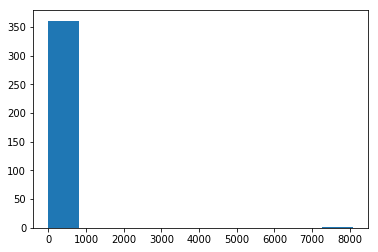

In [2]:
df =pd.read_csv("/home/sharayoo/Desktop/wynum/EAF/predictive_model_data/selectedFeatures_rev3.csv")
plt.hist(df["Mn Ore_MT"],10)
#for i in range(18):
 #   plt.figure()
  #  plt.hist(df.iloc[:,i],10)

In [3]:
fx_true = df.iloc[:,0]

In [4]:
X = df.iloc[:,1:19]


In [5]:
mean_X =np.mean(X)
std_X = np.std(X)


In [6]:
#for x in range(18):
 #   print (random.randint(0,1))
popSize = 100    
population = np.random.rand(popSize,18)
population.shape
T=std_X.T
#np.multiply,std_x_T)
df_mat = np.array(mean_X)+population * np.array(std_X)


In [7]:
w = np.array([-4.92884993e-01,  6.99394572e-02,  3.67148268e+00,  3.24945676e+01,
        7.77427622e+01,  5.23286360e-01, -2.00742301e+01,  1.74258824e+00,
       -6.95108971e+01,  7.80016251e-01, -8.92767083e+01,  4.09713709e+00,
       -4.91180953e+00,  5.45802342e+03, -1.64687710e-01,  6.65157946e+00,
       -5.72957154e-01,  1.16412825e+01])

In [8]:
df_mat[0]

array([4.99036621e+02, 4.12203036e+02, 4.17857875e+02, 1.06512226e+02,
       2.81890706e+00, 1.03940169e+02, 5.08050402e+01, 4.05884123e+02,
       1.17104771e+01, 6.45278045e+01, 1.57700256e+00, 8.58103796e+02,
       8.67682500e+02, 2.00802626e-01, 2.34867636e+03, 7.20894215e+01,
       2.88821485e+02, 1.00856656e+01])

In [9]:

#X_high = []
X_high = mean_X +(2 * std_X)
#print(X_high)
X_low = mean_X - (2 * std_X)

X_low = np.array(X_low)
X_high = np.array(X_high)
#print(X_low)
X_low_new = np.where(X_low <= 0, 0,X_low) 

def fx(X):
    obj_func = []
    CV_arr = []
    #fx_pred_new = []
    for i in range(len(X)):
        CV=0
        for j in range(np.shape(X)[1]):
            if (X[i][j] <= X_high[j]) and (X[i][j] >= X_low[j]):
                CV = CV+0
            else:
                CV = CV + 1
        CV_arr.append(CV)
        obj_func.append(np.sum(w.T * X[i])+ 100 * CV)
    return obj_func,CV_arr
        

In [10]:
fx_pred_new,CV=fx(df_mat)


In [67]:
"""Selection"""
select_x1 = []
for i in range(popSize):
    selectId = np.random.choice(popSize,2)
    if CV[selectId[0]] == CV[selectId[1]]:
        if fx_pred_new[selectId[0]] < fx_pred_new[selectId[1]]:
            select_x1.append(df_mat[selectId[0]])
        else:
            select_x1.append(df_mat[selectId[1]])
            
    elif CV[selectId[0]] < CV[selectId[1]]:
        select_x1.append(CV[selectId[0]])
    else :
        select_x1.append(CV[selectId[1]])
        
        

In [68]:
select_x1 = np.array(select_x1)
select_x1.shape

(100, 18)

In [78]:
select_x2 = []
for i in range(popSize):
    selectId = np.random.choice(popSize,2)
    if CV[selectId[0]] == CV[selectId[1]]:
        if fx_pred_new[selectId[0]] < fx_pred_new[selectId[1]]:
            select_x2.append(df_mat[selectId[0]])
        else:
            select_x2.append(df_mat[selectId[1]])
    elif CV[selectId[0]] < CV[selectId[1]]:
        select_x2.append(CV[selectId[0]])
    else :
        select_x2.append(CV[selectId[1]])        

In [70]:
"""Cross-over"""
"""
cross-over one example

p1 = np.random.randint(2,16)
#print(p1)
x1_arr = np.split(select_x1[1], [p1])
x2_arr = np.split(select_x2[1],[p1])
X10_X21 = np.concatenate((x1_arr[0],x2_arr[1]),axis = 0)
X20_X11 = np.concatenate((x2_arr[0],x1_arr[1]),axis = 0)

"""
child = []
for i in range(len(select_x1)):
    p1 = np.random.randint(2,16)
    x1_arr = np.split(select_x1[i], [p1])
    x2_arr = np.split(select_x2[i],[p1])
    X10_X21 = np.concatenate((x1_arr[0],x2_arr[1]),axis = 0)
    X20_X11 = np.concatenate((x2_arr[0],x1_arr[1]),axis = 0)
    child.append(X10_X21)
    child.append(X20_X11)

    
    


In [71]:
len(child)
len(X10_X21)

18

In [72]:
"""Mutation"""
mutated_child = []
for i in range(len(child)):
    child_mutated = child[i] + np.random.randn(18) * (np.ones([1,18])*1)
    #X20_X11_mutated = X20_X11[i] + np.random.randn(18) * (np.ones([1,18])*10)
    mutated_child.append(child_mutated)
    #mutated_child.append(X20_X11_mutated)

In [73]:
#X10_X21_mutated,X10_X21
obj_mut=fx(np.concatenate( mutated_child, axis=0 ))


In [75]:
fx_pred_new,CV=obj_mut

In [80]:
np.sort(fx_pred_new,CV)

TypeError: an integer is required (got type list)